## Análise de Dados

> Para cada arquivo, foram feitas 20 codificações, medindo seus tempos de compressão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("out.csv")
formats = list(df["Formato"].unique())
colors = dict(zip(formats, ["b", "r"]))
df

,Arquivo,Formato,Tamanho original (bits),Tamanho comprimido (bits),Tamanho Dicionário,Qtd de bits por código,Taxa de compressão,Tempo de compressão (ms),Tempo Relativo (ms/kB)
0,ex (1).txt,ascii,144,144,271,9,1.000000,0.587453,33.419548
1,ex (1).txt,ascii,144,144,271,9,1.000000,1.290226,73.399524
2,ex (1).txt,ascii,144,144,271,9,1.000000,0.310186,17.646137
3,ex (1).txt,ascii,144,144,271,9,1.000000,0.352926,20.077568
4,ex (1).txt,ascii,144,144,271,9,1.000000,0.294827,16.772380
...,...,...,...,...,...,...,...,...,...
275,trie.py,binary,99392,91078,7007,13,1.091284,756.122057,62.320427
276,trie.py,binary,99392,91078,7007,13,1.091284,771.685962,63.603222
277,trie.py,binary,99392,91078,7007,13,1.091284,749.114131,61.742826
278,trie.py,binary,99392,91078,7007,13,1.091284,758.394538,62.507728


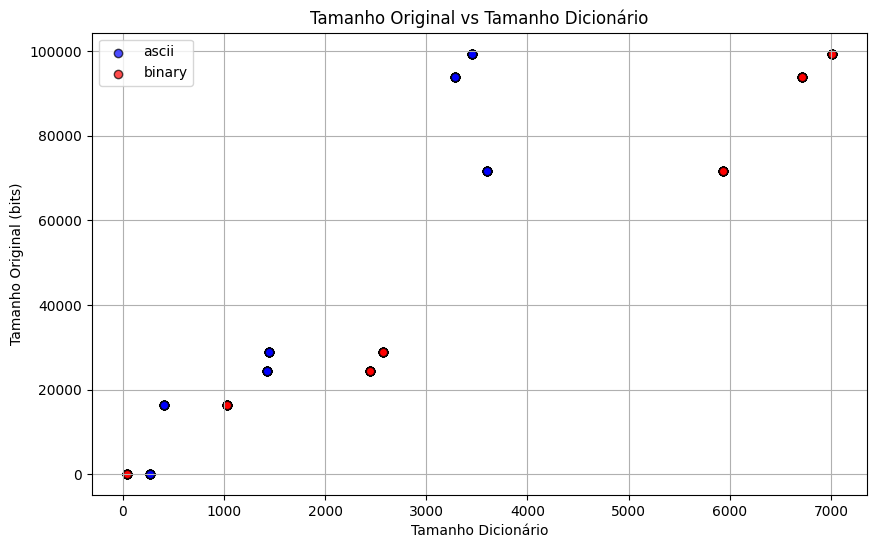

In [3]:
plt.figure(figsize=(10, 6))
for format in formats:
    plt.scatter(
        df.loc[df["Formato"] == format, "Tamanho Dicionário"],
        df.loc[df["Formato"] == format, "Tamanho original (bits)"],
        label=format,
        color=colors[format],
        alpha=0.7,
        edgecolors="k",
    )
plt.grid(True)
plt.legend(formats)
plt.xlabel("Tamanho Dicionário")
plt.ylabel("Tamanho Original (bits)")
plt.title("Tamanho Original vs Tamanho Dicionário")
plt.show()

O tamanho do dicionário tende a crescer linearmente com o tamanho do arquivo de entrada, a codificação ASCII tende a requerer um maior dicionário que a codificação binária.

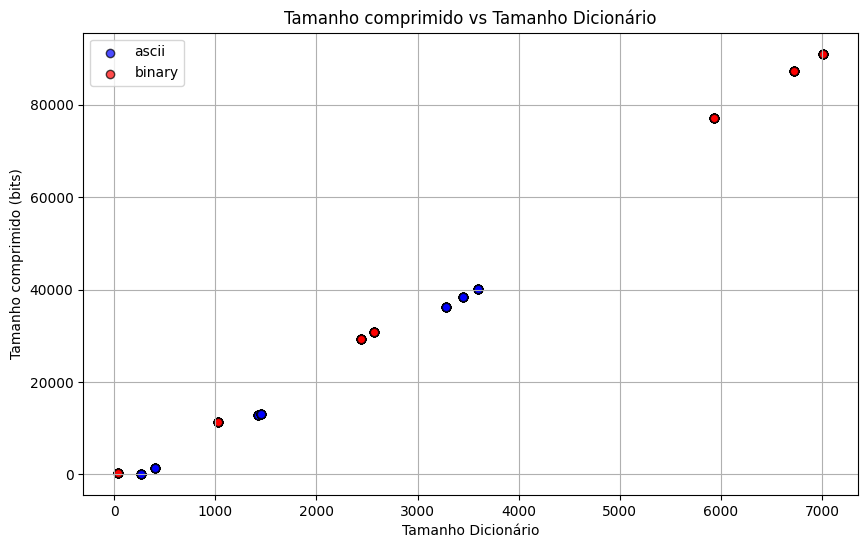

In [4]:
plt.figure(figsize=(10, 6))
for format in formats:
    plt.scatter(
        df.loc[df["Formato"] == format, "Tamanho Dicionário"],
        df.loc[df["Formato"] == format, "Tamanho comprimido (bits)"],
        label=format,
        color=colors[format],
        alpha=0.7,
        edgecolors="k",
    )
plt.grid(True)
plt.legend(formats)
plt.xlabel("Tamanho Dicionário")
plt.ylabel("Tamanho comprimido (bits)")
plt.title("Tamanho comprimido vs Tamanho Dicionário")
plt.show()

Também há um crescimento linear, mas para a saída comprimida, não há grande diferença entre ASCII e binário.

In [5]:
def bootstrap_mean(data, num_samples=10000):
    n = len(data)
    sample_means = np.zeros(num_samples)
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        sample_means[i] = np.mean(sample)
    return sample_means

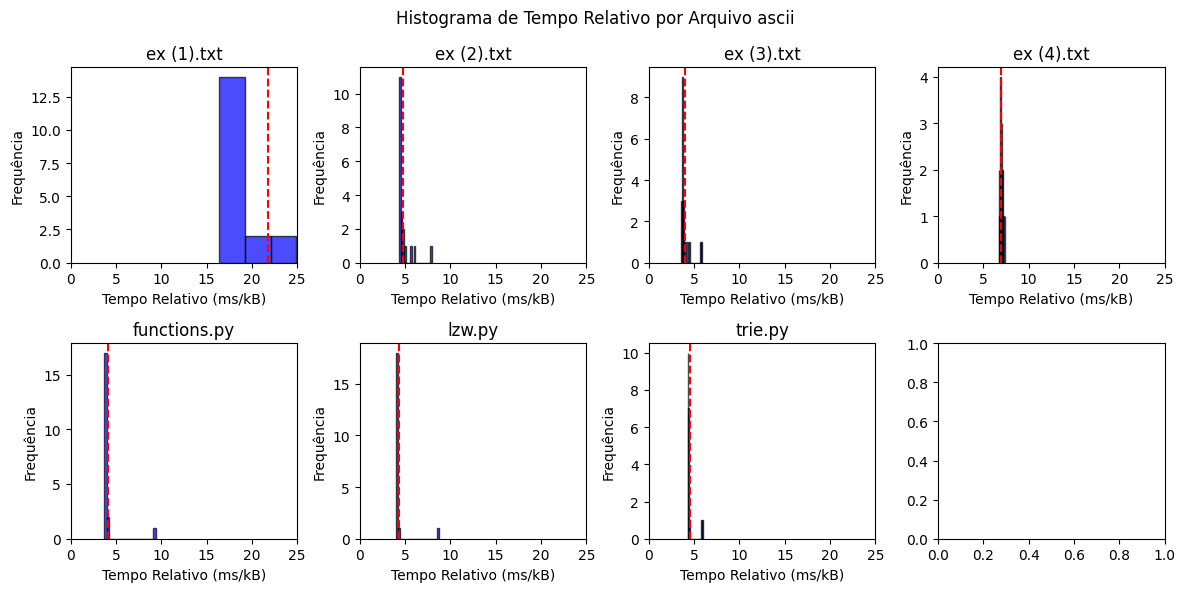

In [6]:
format = formats[0]
fig, ax = plt.subplots(figsize=(12, 6), ncols=4, nrows=2)
fig.suptitle(f"Histograma de Tempo Relativo por Arquivo {format}")
for i, file in enumerate(df["Arquivo"].unique()):
    time = df.loc[
        (df["Arquivo"] == file) & (df["Formato"] == format), "Tempo Relativo (ms/kB)"
    ].values
    sample_means = bootstrap_mean(time)
    ax[i // 4, i % 4].hist(
        time, bins=20, color=colors[format], alpha=0.7, edgecolor="k"
    )
    ax[i // 4, i % 4].axvline(np.mean(sample_means), color="r", linestyle="--")
    ax[i // 4, i % 4].set_title(file)
    ax[i // 4, i % 4].set_xlabel("Tempo Relativo (ms/kB)")
    ax[i // 4, i % 4].set_ylabel("Frequência")
    ax[i // 4, i % 4].set_xlim(0, 25)
plt.tight_layout()
plt.show()

Esses são os tempos (ms) relativos ao tamanho do arquivo (kB), que tendem a serem consistentes, exceto alguns casos atípicos, que podem ser atribuídos a forma de medição do tempo.

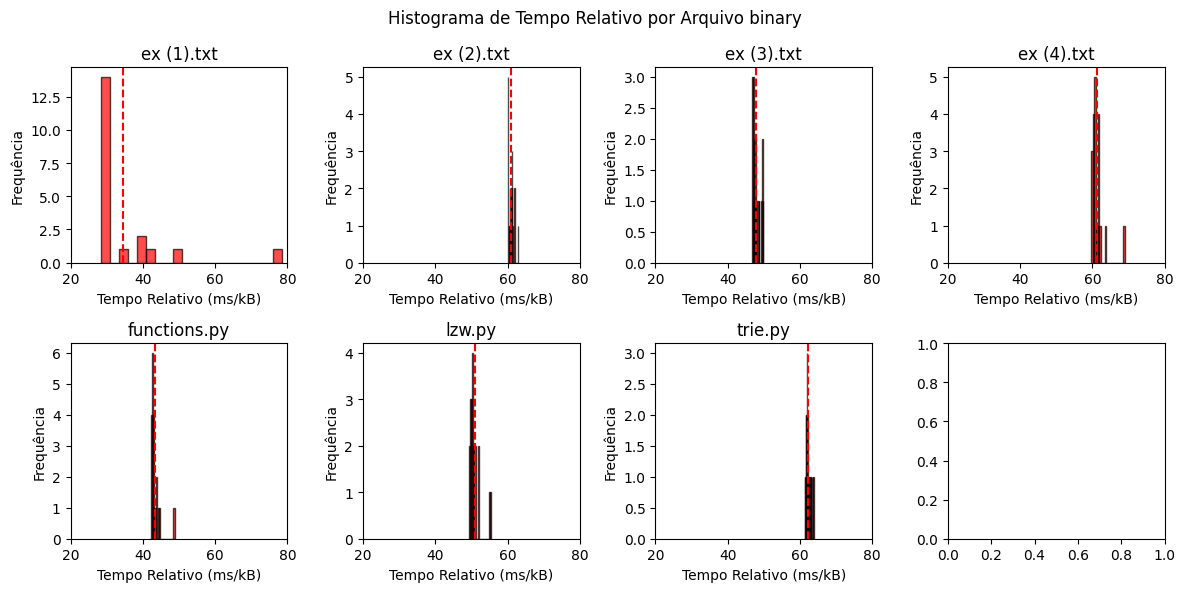

In [7]:
format = formats[1]
fig, ax = plt.subplots(figsize=(12, 6), ncols=4, nrows=2)
fig.suptitle(f"Histograma de Tempo Relativo por Arquivo {format}")
for i, file in enumerate(df["Arquivo"].unique()):
    time = df.loc[
        (df["Arquivo"] == file) & (df["Formato"] == format), "Tempo Relativo (ms/kB)"
    ].values
    sample_means = bootstrap_mean(time)
    ax[i // 4, i % 4].hist(
        time, bins=20, color=colors[format], alpha=0.7, edgecolor="k"
    )
    ax[i // 4, i % 4].axvline(np.mean(sample_means), color="r", linestyle="--")
    ax[i // 4, i % 4].set_title(file)
    ax[i // 4, i % 4].set_xlabel("Tempo Relativo (ms/kB)")
    ax[i // 4, i % 4].set_ylabel("Frequência")
    ax[i // 4, i % 4].set_xlim(20, 80)
plt.tight_layout()
plt.show()

Compressão de arquivos binário tendem a terem um maior custo temporal comparados à codificação ASCII.

In [8]:
tempos_relativos = (
    df[
        [
            "Arquivo",
            "Formato",
            "Taxa de compressão",
            "Tamanho original (bits)",
            "Tempo Relativo (ms/kB)",
        ]
    ]
    .groupby(["Arquivo", "Formato"])
    .mean()
)
tempos_relativos.reset_index(inplace=True)
tempos_relativos

,Arquivo,Formato,Taxa de compressão,Tamanho original (bits),Tempo Relativo (ms/kB)
0,ex (1).txt,ascii,1.000000,144.0,21.774549
1,ex (1).txt,binary,0.571429,144.0,34.468119
2,ex (2).txt,ascii,2.585425,93944.0,4.817555
3,ex (2).txt,binary,1.075847,93944.0,60.950479
4,ex (3).txt,ascii,1.790083,71768.0,4.037740
5,ex (3).txt,binary,0.930336,71768.0,47.889986
6,ex (4).txt,ascii,11.921569,16416.0,6.974512
7,ex (4).txt,binary,1.448897,16416.0,61.340744
8,functions.py,ascii,1.894508,24424.0,4.144606
9,functions.py,binary,0.834837,24424.0,43.327026


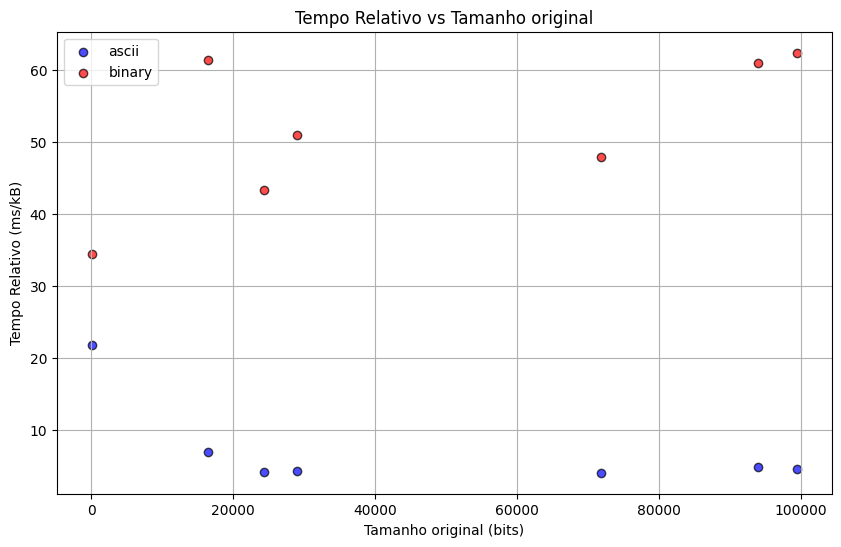

In [9]:
plt.figure(figsize=(10, 6))
for format in formats:
    plt.scatter(
        tempos_relativos.loc[
            tempos_relativos["Formato"] == format, "Tamanho original (bits)"
        ],
        tempos_relativos.loc[
            tempos_relativos["Formato"] == format, "Tempo Relativo (ms/kB)"
        ],
        label=format,
        color=colors[format],
        alpha=0.7,
        edgecolors="k",
    )
plt.grid(True)
plt.legend(formats)
plt.xlabel("Tamanho original (bits)")
plt.ylabel("Tempo Relativo (ms/kB)")
plt.title("Tempo Relativo vs Tamanho original")
plt.show()

Mostrando a diferença temporal entre ASCII e binário

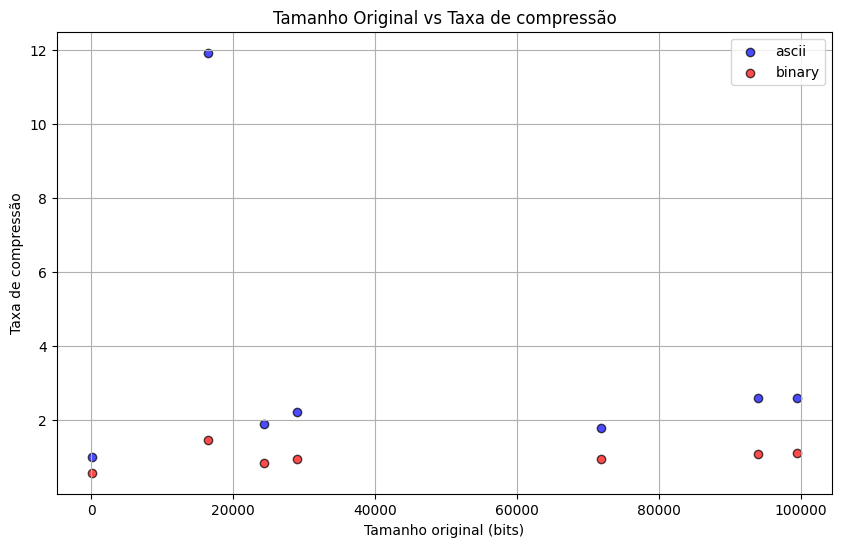

In [10]:
plt.figure(figsize=(10, 6))
for format in formats:
    plt.scatter(
        tempos_relativos.loc[
            tempos_relativos["Formato"] == format, "Tamanho original (bits)"
        ],
        tempos_relativos.loc[
            tempos_relativos["Formato"] == format, "Taxa de compressão"
        ],
        label=format,
        color=colors[format],
        alpha=0.7,
        edgecolors="k",
    )
    plt.grid(True)
    plt.legend(formats)
    plt.xlabel("Tamanho original (bits)")
    plt.ylabel("Taxa de compressão")
    plt.title("Tamanho Original vs Taxa de compressão")
    plt.show

Codificação ASCII tende a ter melhor taxa de compressão, o fato de usarem maiores dicionários tem um benefício em desempenho.